## Introduction
In this project, stackoverflow developer servey 2020 dataset is being used to study on the behaviour of the developers across the world.

Here we will try to answer the following questions

##### 3. Will developers have more Job Satisfaction by having a Master's degree over a Bachelor's degree in some field or by having a CS Major over a Non-CS Major?




In [15]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
# gathering data 
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [17]:
#data cleanup and preparation
df_job_sat=df[df.JobSat.notna()]

#splitting the developers as CS and non CS background based on the primary field of study
df_job_sat_cs=df_job_sat[list(map(lambda x:x in ['Computer science, computer engineering, or software engineering','Web development or web design','Information systems, information technology, or system administration'], df_job_sat.UndergradMajor))]
df_job_sat_non_cs=df_job_sat[list(map(lambda x:x not in ['Computer science, computer engineering, or software engineering','Web development or web design','Information systems, information technology, or system administration'], df_job_sat.UndergradMajor))]

#splitting the developers having bachelors and masters degree based on their highest level of formal education
df_job_sat_bachelors=df_job_sat[list(map(lambda x:x in ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'], df_job_sat.EdLevel))]
df_job_sat_masters=df_job_sat[list(map(lambda x:x in ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'], df_job_sat.EdLevel))]


In [18]:
#calculating job satisfaction rating percentage of developers with cs background
df_job_sat_cs_perct=pd.DataFrame(df_job_sat_cs.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_cs.shape[0]).reset_index()
df_job_sat_cs_perct.columns=['Rating','Percentage of respondents']
df_job_sat_cs_perct['Category']='CS Major'
df_job_sat_cs_perct

,Rating,Percentage of respondents,Category
0,Very satisfied,31.006746,CS Major
1,Slightly satisfied,30.958095,CS Major
2,Slightly dissatisfied,16.139076,CS Major
3,Neither satisfied nor dissatisfied,13.560586,CS Major
4,Very dissatisfied,8.335496,CS Major


In [19]:
#calculating job satisfaction rating percentage of developers with non cs background
df_job_sat_non_cs_perct=pd.DataFrame(df_job_sat_non_cs.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_non_cs.shape[0]).reset_index()
df_job_sat_non_cs_perct.columns=['Rating','Percentage of respondents']
df_job_sat_non_cs_perct['Category']='Non-CS Major'
df_job_sat_non_cs_perct

,Rating,Percentage of respondents,Category
0,Very satisfied,35.169196,Non-CS Major
1,Slightly satisfied,30.531959,Non-CS Major
2,Slightly dissatisfied,14.956134,Non-CS Major
3,Neither satisfied nor dissatisfied,11.154435,Non-CS Major
4,Very dissatisfied,8.188275,Non-CS Major


In [20]:
#concatinating the above two results
df_job_sat_perct1=pd.concat([df_job_sat_cs_perct,df_job_sat_non_cs_perct,], ignore_index=True)
df_job_sat_perct1

,Rating,Percentage of respondents,Category
0,Very satisfied,31.006746,CS Major
1,Slightly satisfied,30.958095,CS Major
2,Slightly dissatisfied,16.139076,CS Major
3,Neither satisfied nor dissatisfied,13.560586,CS Major
4,Very dissatisfied,8.335496,CS Major
5,Very satisfied,35.169196,Non-CS Major
6,Slightly satisfied,30.531959,Non-CS Major
7,Slightly dissatisfied,14.956134,Non-CS Major
8,Neither satisfied nor dissatisfied,11.154435,Non-CS Major
9,Very dissatisfied,8.188275,Non-CS Major


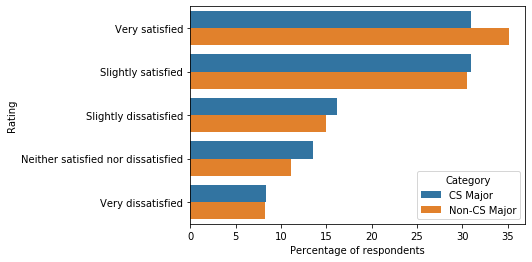

In [21]:
sns.barplot(x='Percentage of respondents', y='Rating', data=df_job_sat_perct1, hue='Category')

In [24]:
#calculating job satisfaction rating percentage of developers with bachelors degree
df_job_sat_bachelors_perct=pd.DataFrame(df_job_sat_bachelors.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_bachelors.shape[0]).reset_index()
df_job_sat_bachelors_perct.columns=['Rating','Percentage of respondents']
df_job_sat_bachelors_perct['Category']="Bachelor's degree"
df_job_sat_bachelors_perct

,Rating,Percentage of respondents,Category
0,Slightly satisfied,31.303438,Bachelor's degree
1,Very satisfied,30.998727,Bachelor's degree
2,Slightly dissatisfied,16.272512,Bachelor's degree
3,Neither satisfied nor dissatisfied,13.343642,Bachelor's degree
4,Very dissatisfied,8.081681,Bachelor's degree


In [25]:
#calculating job satisfaction rating percentage of developers with masters degree
df_job_sat_masters_perct=pd.DataFrame(df_job_sat_masters.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_masters.shape[0]).reset_index()
df_job_sat_masters_perct.columns=['Rating','Percentage of respondents']
df_job_sat_masters_perct['Category']="Master's degree"
df_job_sat_masters_perct

,Rating,Percentage of respondents,Category
0,Very satisfied,32.946818,Master's degree
1,Slightly satisfied,30.854403,Master's degree
2,Slightly dissatisfied,15.501308,Master's degree
3,Neither satisfied nor dissatisfied,12.493461,Master's degree
4,Very dissatisfied,8.204010,Master's degree


In [26]:
#concatinating the above two results
df_job_sat_perct2=pd.concat([df_job_sat_masters_perct,df_job_sat_bachelors_perct], ignore_index=True)
df_job_sat_perct2

,Rating,Percentage of respondents,Category
0,Very satisfied,32.946818,Master's degree
1,Slightly satisfied,30.854403,Master's degree
2,Slightly dissatisfied,15.501308,Master's degree
3,Neither satisfied nor dissatisfied,12.493461,Master's degree
4,Very dissatisfied,8.204010,Master's degree
5,Slightly satisfied,31.303438,Bachelor's degree
6,Very satisfied,30.998727,Bachelor's degree
7,Slightly dissatisfied,16.272512,Bachelor's degree
8,Neither satisfied nor dissatisfied,13.343642,Bachelor's degree
9,Very dissatisfied,8.081681,Bachelor's degree


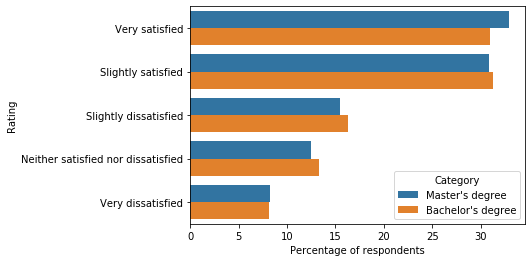

In [27]:
sns.barplot(x='Percentage of respondents', y='Rating', data=df_job_sat_perct2, hue='Category')